IN3190 Prosjekt oppgave


In [64]:
#først importerer det jeg trenger:
import numpy as np
from numpy import pi, exp, sin, log10
import matplotlib.pyplot as plt
from scipy.signal import tukey
import scipy.io
from scipy.interpolate import CubicSpline
import scipy.interpolate as interpolate

For det første oppgaven så skriver jeg en funksjon som konvolverer et input signal x(n) med en FIR filter h(n). Funksjonene skal returnere kkonvulert signal

In [65]:
def konvin3190(x,ylen,h):
    M, N = len(h), len(x)
    y = np.zeros(M+N-1)
    
    for m in range(1, M):
        for n in range(1,N):
            o = n+m-1
            y[o] = y[o] + x[n]*h[m]
            
    if ylen == 0: #needs to return out-signal with the length of 'x' signal
        a, b = int(np.floor(0.5*(M-1))), int(np.ceil(0.5*(M-1) +1))
        return y[b:int(M+N-1-a)]
    else:
        return y

def list_konvin3190(x, ylen,h):
    m, n = np.shape(x)
    m = m-1
    box = np.zeros((m,n))
    fs_array = np.zeros((m,n))
    for i in range(n):
        box[:,i]= konvin3190(x[:,i], ylen, h)
    return box
    
    

Oppgave 1B: For den neste delen så skriver jeg en fuskjon 'frekspekin3190' som skal da ta inn signalet, og to parametere som bestemer hvor mange punkter til å sample og samplingsrekvensen. Funksjonen skal da returnere det komplekse frekvensspekteret og tilhørende frekvens 'f'. Etter det skal vi lage en funksjon som lager en liten filter som beskrevet i oppgave teksten.

In [66]:
def frekspekin3190(x, N, fs):
    X = np.zeros(N,dtype = complex)
    w = np.linspace(0, pi, N)    #N-data punkter som omega(w)
    for i in range(N):
        for j in range(len(x)):
            X[i] = X[i] +x[j]*exp(-1J*w[i]*(j-1))
    f = (w*fs)/(2*pi) # radiener per sample

    return X, f

#lager en frekvens analyse for flere arrayer:

def list_frekspekin3190(x, N, fs):
    m, n = np.shape(x)
    list_frekv = np.zeros((m,n),dtype = complex)
    fs_array = np.zeros((m,n))
    for i in range(n):
        list_frekv[:,i], fs_array[:,i] = frekspekin3190(x[:,i], N, fs)
    return list_frekv, fs_array


In [67]:
#filter funksjon 
def filter_h(size):
    return (1/5)*np.ones(size)

1C: For den neste delen skal vi plotte frekvens spekteret |H (ejω)| til h[n], |X (ejω)|og |Y (ejω)|til x[n], og y[n] = h[n] ∗x[n] i samme plott.

In [68]:
#oppgave 1c plott 
#verdier bestemt av ooppgave teksten:
f1, f2 = 10, 20                 #Hz
fs = 100                       #Hz
t_len = 5                       #sekunder 
t = np.arange(0, t_len, 1/fs)   #tidsarray
h = filter_h(4)                 #filter
x = sin(2*pi*f1*t) + sin(2*pi*f2*t)   #x[n] signal

#regner fram det vi skal plotte
y_sig = konvin3190(x,0, h)  #får fram y(n) ved å konolvere x(n) og h(n)
N = 1000

H, hf = frekspekin3190(h, N, fs)
X, fx = frekspekin3190(x, N, fs)
Y, fy = frekspekin3190(y_sig, N, fs)

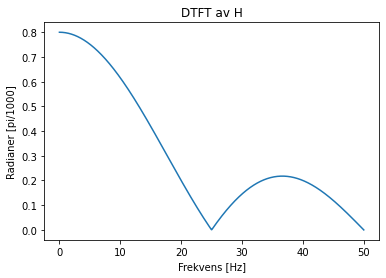

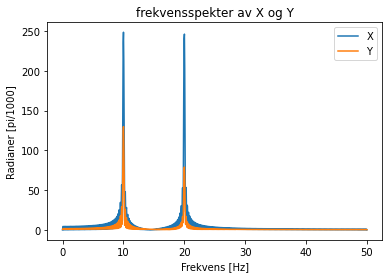

In [69]:
#plotter H først
plt.plot(hf, abs(H))
plt.title("DTFT av H")
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()

#plotter X og Y 
plt.plot(fx, abs(X), fy, abs(Y))
#plot(f2, abs(Y))
plt.title("frekvensspekter av X og Y")
plt.legend(["X", "Y"])
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Radianer [pi/1000]")
plt.show()



Oppgave 2:
for den neste delen skal vi jobbe med støy fjerning

In [70]:
#oppgave 2 data
#importerer alle sub-filene
mat_fil = scipy.io.loadmat('vibishar.mat')

offset1 = np.array(mat_fil['offset1'])
offset2 = np.array(mat_fil['offset2'])
seis1 = np.array(mat_fil['seismogram1'])
seis2 = np.array(mat_fil['seismogram2'])
time = np.array(mat_fil['t']) 
#oppdaterer fs:
fs = 1/(time[1]-time[0])
#oppgave 2a FIR lav-pass filtere 
h1 = [0.0002, 0.0001, -0.0001, -0.0005, -0.0011, -0.0017, -0.0019, 
    -0.0016, -0.0005, 0.0015, 0.0040, 0.0064, 0.0079, 0.0075, 0.0046, 
    -0.0009, -0.0084, -0.0164, -0.0227, -0.0248, -0.0203, -0.0079, 
    0.0127, 0.0400, 0.0712, 0.1021, 0.1284, 0.1461, 0.1523, 0.1461, 
    0.1284, 0.1021, 0.0712, 0.0400, 0.0127, -0.0079, -0.0203, -0.0248, 
    -0.0227, -0.0164, -0.0084, -0.0009, 0.0046, 0.0075, 0.0079, 0.0064, 
    0.0040, 0.0015, -0.0005, -0.0016, -0.0019, -0.0017, -0.0011, 
    -0.0005, -0.0001, 0.0001, 0.0002]

h2 = [-0.0002, -0.0001, 0.0003, 0.0005, -0.0001, -0.0009, -0.0007, 
    0.0007, 0.0018, 0.0005, -0.0021, -0.0027, 0.0004, 0.0042, 0.0031, 
    -0.0028, -0.0067, -0.0023, 0.0069, 0.0091, -0.0010, -0.0127, 
    -0.0100, 0.0077, 0.0198, 0.0075, -0.0193, -0.0272, 0.0014, 0.0386, 
    0.0338, -0.0246, -0.0771, -0.0384, 0.1128, 0.2929, 0.3734, 0.2929, 
    0.1128, -0.0384, -0.0771, -0.0246, 0.0338, 0.0386, 0.0014, -0.0272, 
    -0.0193, 0.0075, 0.0198, 0.0077, -0.0100, -0.0127, -0.0010, 0.0091, 
    0.0069, -0.0023, -0.0067, -0.0028, 0.0031, 0.0042, 0.0004, -0.0027, 
    -0.0021, 0.0005, 0.0018, 0.0007, -0.0007, -0.0009, -0.0001, 0.0005, 
    0.0003, -0.0001, -0.0002]

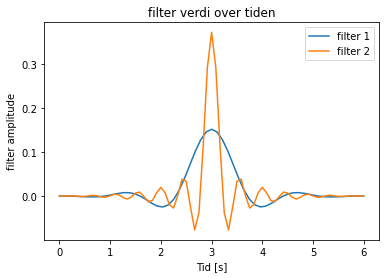

In [71]:
#oppgave 2a plotter filter over tid
time_h1 = np.linspace(0, 6, len(h1))
time_h2 = np.linspace(0, 6, len(h2))

plt.plot(time_h1, h1, time_h2, h2)
plt.title('filter verdi over tiden')
plt.legend(['filter 1', 'filter 2'])
plt.xlabel('Tid [s]')
plt.ylabel('filter amplitude')
plt.show()


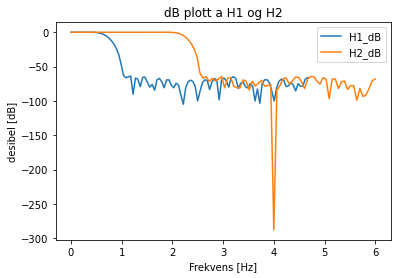

In [72]:
#plotter i frekensspekter i DB
#plotter i DB
N = 100
fs1 = 1/(time_h1[1] - time_h1[0])
fs2 = 1/(time_h2[1] - time_h2[0])

H1, H1f = frekspekin3190(h1, N, fs1)
H2, H2f= frekspekin3190(h2, N, fs2)

Hdb1 = 20*log10(abs(H1))
Hdb2 = 20*log10(abs(H2))

plt.plot(H1f, Hdb1, H2f, Hdb2)
plt.legend(['H1_dB', 'H2_dB'])
plt.title('dB plott a H1 og H2')
plt.xlabel("Frekvens [Hz]")
plt.ylabel("desibel [dB]")
plt.show()

fra plottet oppe, ser vi at H2 filtrer ikke så mange frekvenser som H1

Oppgave 2b

In [73]:
print('lenth of time array:', len(time))
print('lenth of seis1 array:', len(seis1))
print('lenth of seis2 array:', len(seis2))

lenth of time array: 1501
lenth of seis1 array: 1501
lenth of seis2 array: 1501


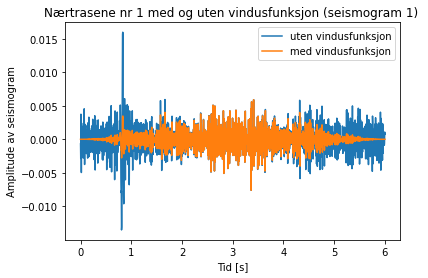

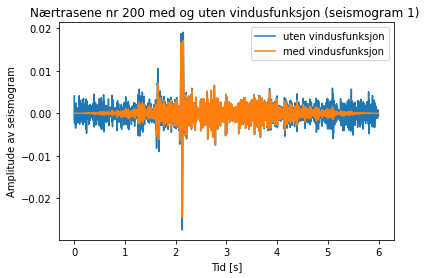

"\n#plotter frekvesnspekter med og uten vindusfunksjon:\nF_seis1, fs_seis1 = list_frekspekin3190(seis1_short, N, fs)\n#regner frekvensspektrum med vindusfunksjon\nF_seis1_vin, fs_seis1_vin = list_frekspekin3190(window(seis1_short), N, fs)\n\nplt.plot(fs_seis1, 20*log10(abs(F_seis1)))\nplt.title('frekvensspekter uten vindus funksjon')\nplt.xlabel('frekvens [Hz]')\nplt.ylabel('desibel [dB]')\nplt.show()\n\n\nplt.plot(fs_seis1_vin, 20*log10(abs(F_seis1_vin)))\nplt.title('frekvensspekter med vindus funksjon')\nplt.xlabel('frekvens [Hz]')\nplt.ylabel('dB')\nplt.show()\n"

In [74]:
#tar en liten del av data-mengden
seis1_short = seis1[:, 0:9] #tar de første 10 data mengdene
seis2_short = seis2[:, 0:9] #tar de første 10 datamengder
time_short = time[:]

#vindus funksjon: (seismogram 1)
vin1 = tukey(len(seis1_short), 0.9)*seis1_short[:,0]  #trase 1
vin200 = tukey(len(seis2_short), 0.9)*seis1[:,200]  #trase 1

#plotter seismogram 1, trase 1
plt.title('Nærtrasene nr 1 med og uten vindusfunksjon (seismogram 1) ')
plt.plot(time_short, seis1_short[:,0])
plt.plot(time_short, vin1 )
plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

#plotter seismogram 1, trase 2
plt.title('Nærtrasene nr 200 med og uten vindusfunksjon (seismogram 1) ')
plt.plot(time_short, seis1[:,200])
plt.plot(time_short, vin200 )
plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

#funksjon for å bruke vindusfunksjon
def window(seismogram_info):
    M, N = np.shape(seismogram_info)
    with_window = np.zeros((M,N))
    for i in range (N):
        with_window[:,i] = tukey(len(seismogram_info), 0.8)*seismogram_info[:,i]
    
    return with_window


"""
#plotter frekvesnspekter med og uten vindusfunksjon:
F_seis1, fs_seis1 = list_frekspekin3190(seis1_short, N, fs)
#regner frekvensspektrum med vindusfunksjon
F_seis1_vin, fs_seis1_vin = list_frekspekin3190(window(seis1_short), N, fs)

plt.plot(fs_seis1, 20*log10(abs(F_seis1)))
plt.title('frekvensspekter uten vindus funksjon')
plt.xlabel('frekvens [Hz]')
plt.ylabel('desibel [dB]')
plt.show()


plt.plot(fs_seis1_vin, 20*log10(abs(F_seis1_vin)))
plt.title('frekvensspekter med vindus funksjon')
plt.xlabel('frekvens [Hz]')
plt.ylabel('dB')
plt.show()
"""

Oppgave 2c: avender filtere på signalen

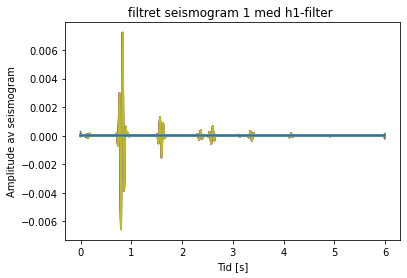

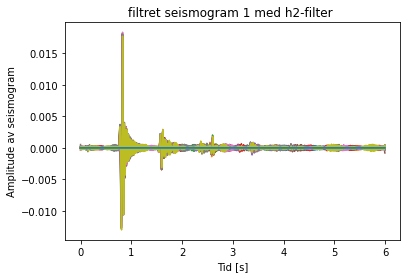

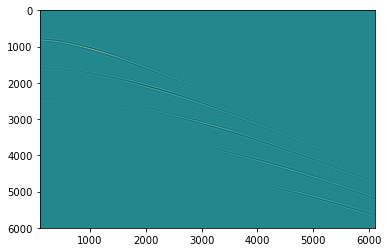

In [75]:
m,n = np.shape(seis1)
def filter_seis(seismogram, filter_type):
    m,n = np.shape(seismogram)
    filtered = np.zeros((m-1,n)) #tom array for filterert seismogram

    #filterer en rad om gangen ved å bruke hvor konvin funksjon:
    for i in range(9):  #første fem radene
        filtered[:,i] = konvin3190(seismogram[:,i],0, filter_type)
    return filtered

plt.title('filtret seismogram 1 med h1-filter ')
plt.plot(time[0:m-1], filter_seis(seis1, h1))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()

plt.title('filtret seismogram 1 med h2-filter ')
plt.plot(time[0:m-1], filter_seis(seis1, h2))
#plt.legend(['uten vindusfunksjon', 'med vindusfunksjon'])
plt.xlabel('Tid [s]')
plt.ylabel('Amplitude av seismogram')
plt.show()
filt1 = list_konvin3190(seis1,0, h1)
plt.imshow(filt1,extent=[100,6100,6000,0], aspect='auto')

Oppgave 3a: Fjernfeltssignatur: ved å isolere offseten kan vi finne frekvensen til impulsen.

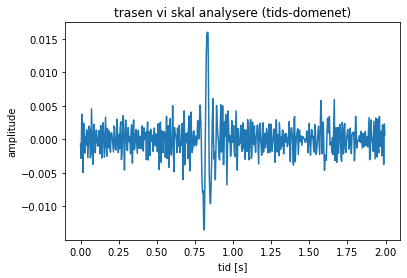

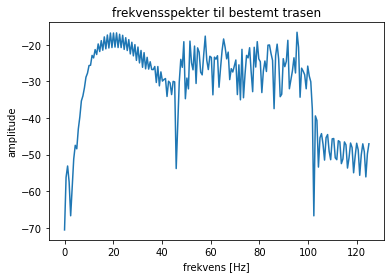

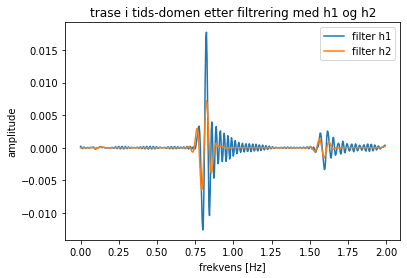

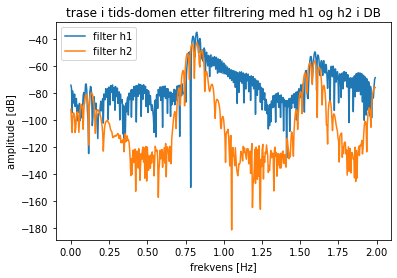

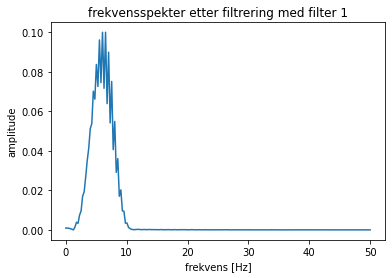

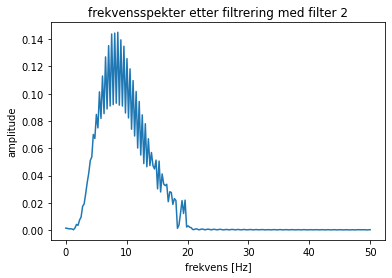

In [76]:
#bruker frekvensspekteret til filterene vi brukte: H1 og H2, H1f, H2f

#først isolerer den delen som vist i figur 9
offset1_isolated = seis1[0:500, 0]#røde område
time_isolated = time[0:500]

#plotter trasen i over den bestemte tids-intervallet
plt.plot(time_isolated, offset1_isolated)
plt.title('trasen vi skal analysere (tids-domenet)')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#plotter frekvens spekteret:
sampling_f = 1/(time[2]-time[1])
f1, fs = frekspekin3190(offset1_isolated, 200, sampling_f)
plt.title('frekvensspekter til bestemt trasen')
plt.plot(fs, 20*log10(abs(f1)))
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.show()


#filtrer signalet vi har:
filt_iso1 = konvin3190(offset1_isolated,0, h1)
filt_iso2 = konvin3190(offset1_isolated,0, h2)
plt.plot(time_isolated[0:499], filt_iso2)
plt.plot(time_isolated[0:499], filt_iso1)
plt.title('trase i tids-domen etter filtrering med h1 og h2')
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.legend(['filter h1', 'filter h2'])
plt.show()

filt_iso1 = konvin3190(offset1_isolated,0, h1)
filt_iso2 = konvin3190(offset1_isolated,0, h2)
plt.plot(time_isolated[0:499], 20*log10(abs(filt_iso2)))
plt.plot(time_isolated[0:499], 20*log10(abs(filt_iso1)))
plt.title('trase i tids-domen etter filtrering med h1 og h2 i DB')
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude [dB]')
plt.legend(['filter h1', 'filter h2'])
plt.show()

#frekvens analyse av isolert+filteret signal:
F_filt1, fs_filt1 = frekspekin3190(filt_iso1, 200, 1/(t[1]-t[0]))
plt.plot(fs_filt1, abs(F_filt1))
plt.title('frekvensspekter etter filtrering med filter 1')
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.show()

F_filt2, fs_filt2 = frekspekin3190(filt_iso2, 200, 100)
plt.plot(fs_filt2, abs(F_filt2))
plt.title('frekvensspekter etter filtrering med filter 2')
plt.xlabel('frekvens [Hz]')
plt.ylabel('amplitude')
plt.show()



Jeg velger filter H1


Oppgave 3b:

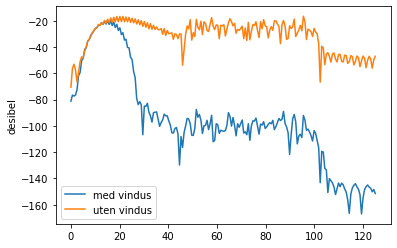

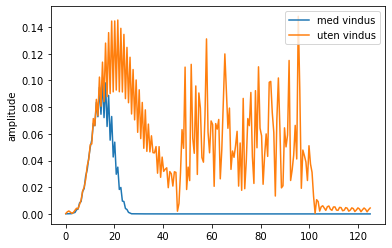

In [77]:
#for å ungå kant effekter, bruker vi vindusfunksjonen:
vin_of1 = tukey(len(filt_iso1), 0.5)*filt_iso1
F_wo1, fs_wo1 = frekspekin3190(vin_of1, 200, sampling_f)

plt.plot(fs_wo1, 20*log10(abs(F_wo1)), fs, 20*log10(abs(f1)))
plt.legend(['med vindus', 'uten vindus'])
plt.ylabel('desibel')
plt.show()

plt.plot(fs_wo1, abs(F_wo1), fs, abs(f1))
plt.legend(['med vindus', 'uten vindus'])
plt.ylabel('amplitude')
plt.show()

Fra plottet oppe så ser vi at frekvensen med størst amplitude var ved 17.7Hz 

oppgave 3c: hva er den vertikale oppløsningen dersom vi antar at frekvensen i bølgefeltet er den samme som den
dominante frekvensen i forrige oppgave?

In [78]:
C = 3000    #m/s
frekv = 17.7 #Hz
lmbda = C/frekv
print('bølgelengde =', lmbda,'meter')
vertikal_opp = (1/8)*lmbda
print('vertikal oppløsning =', vertikal_opp,'meter')

bølgelengde = 169.49152542372883 meter
vertikal oppløsning = 21.186440677966104 meter


Oppgave 4a og 4b: Et plott av nærtrasen med primærrefleksjonen og de tre første havbunnsmultiplene. Plott  impulsene i gatheret ved første offset, med hovedrefleksjonen som ett kryss og refleksjonene som sirkler

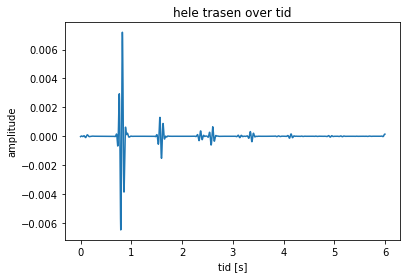

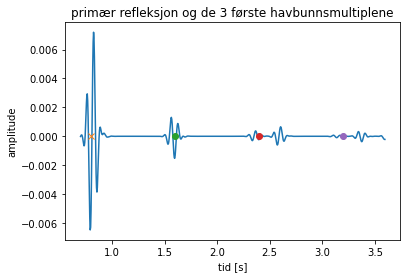

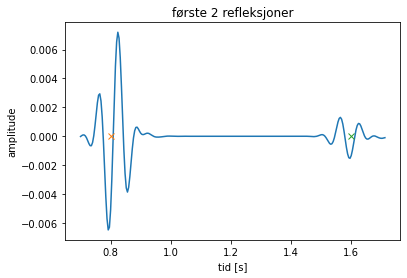

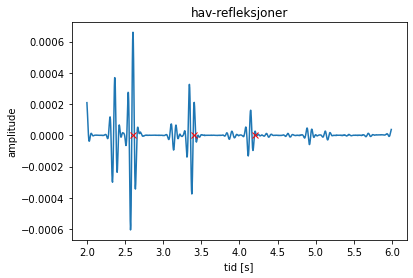

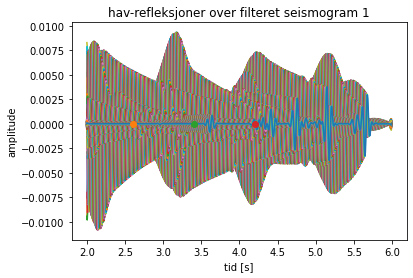

In [79]:
#plotter alle multipler (refleksjoner)
plt.plot(time[0:1500], konvin3190(seis1[:,0], 0, h1))
plt.title('hele trasen over tid')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#plott av de 4 første refleksjoner (oppgave 4b)
plt.plot(time[175:900], konvin3190(seis1[175:901,0], 0, h1))
plt.plot(0.8, 0, marker = 'x') #hoved refleksjon 
plt.plot(1.6, 0, marker = 'o')
plt.plot(2.4, 0, marker = 'o')
plt.plot(3.2, 0, marker = 'o')
plt.title('primær refleksjon og de 3 første havbunnsmultiplene')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#plott av de to første refleksjoner for å finne fram 
plt.plot(time[175:429], konvin3190(seis1[175:430,0], 0, h1))
plt.title('første 2 refleksjoner')
plt.plot(0.8, 0, marker = 'x')
plt.plot(1.6, 0, marker = 'x')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#oppgave 4b 
plt.plot(time[500:1499], konvin3190(seis1[500:1500,0], 0, h1))
plt.title('hav-refleksjoner')
plt.plot(2.6, 0, 'rx')
plt.plot(3.4, 0, 'rx')
plt.plot(4.2, 0, 'rx')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()

#fult plott av seismogram 1 med punktene
plt.plot(time[500:1499], list_konvin3190(seis1[500:1500,:], 0, h1))
plt.title('hav-refleksjoner over filteret seismogram 1')
plt.plot(2.6, 0, 'o')
plt.plot(3.4, 0, 'o')
plt.plot(4.2, 0, 'o')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
plt.show()


I oppgave 4a, ser vi at C_w er rundt 0.8sekunder 

Oppgave 5:

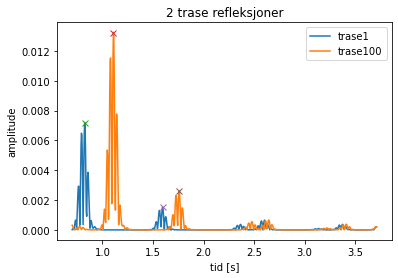

0.28400000000000014 0.16090000000000004
velocity = 1624.6953696181954


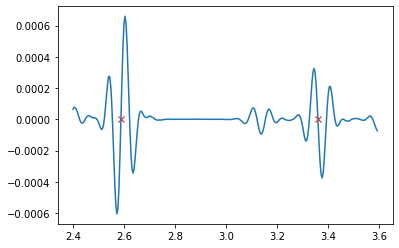

time difference: 0.77
velocity = 1298.7012987012986


In [80]:
plt.plot(time[175:929], abs(konvin3190(seis1[175:930, 0], 0, h1)))
plt.plot(time[175:929], abs(konvin3190(seis1[175:930, 100], 0, h1)))
plt.legend(['trase1', 'trase100'])
plt.title('2 trase refleksjoner')
plt.xlabel('tid [s]')
plt.ylabel('amplitude')
#første bølgetopper
plt.plot(0.824, 0.00716, marker = 'x')
plt.plot(1.108, 0.0132, marker = 'x')
#bølgetopper 2
plt.plot(1.5960, 0.001518, marker = 'x')
plt.plot(1.7599, 0.002627, marker = 'x')

plt.show()


s = 100 + 100            #første trasse er 100 meter fra kilde, og 10 etter det 
dt1 = 1.108 - 0.824 
dt2 = 1.7599 - 1.599
tid =  dt1 - dt2         #tidsforskjell mellom bølgetoppene sekunder
print(dt1, dt2)

V = s/tid          #m/s
print('velocity =', V)

#prøver på nytt
gat = konvin3190(seis1[600:900, 0], 0, h1)
plt.plot(2.59, 0, 'rx')
plt.plot(3.36, 0, 'rx')
plt.plot(time[600:899], gat)
plt.show()

print('time difference:', 3.36-2.59)
print('velocity =', 10/(0.77e-2))

oppgave 6

In [81]:
#python kode fra oppgaven
def nmo_correction(t, dt, offset, seisdata, vnmo):

    seisnmo = np.zeros(seisdata.shape)
    # reflecttimes = np.sqrt(np.square(t) + np.divide(np.square(offset.astype("double")), np.square(vnmo)))
    reflecttimes = np.sqrt(np.square(t) + np.divide(np.square(offset.astype("double")),np.square(vnmo)))  
    reflecttimes_1 = reflecttimes.copy()
    reflecttimes = np.multiply(reflecttimes, np.logical_and(reflecttimes >= dt, reflecttimes <= (t[-1] - dt)))
    reflecttimes_2 = reflecttimes.copy()
    for i in range(0, offset.size):
        interp = interpolate.interp1d(np.squeeze(t), seisdata[:,i], axis=0, kind="cubic", bounds_error=False, fill_value=0)
        seisnmo[:,i] = np.squeeze(interp(reflecttimes[:,i]))
    return seisnmo, reflecttimes_1, reflecttimes_2
    
def reflection_time(t0, x, vnmo):
    t = np.sqrt(t0**2 + x**2/vnmo**2)
    return t


def sample_trace(trace, time, dt):
    before = int(np.floor(time/dt))
    N = trace.size
    samples = np.arange(before - 1, before + 3)
    if any(samples < 0) or any(samples >= N):
        amplitude = None
    else:
        times = dt*samples
        amps = trace[samples]
        interpolator = CubicSpline(times, amps)
        amplitude = interpolator(time)
    return amplitude

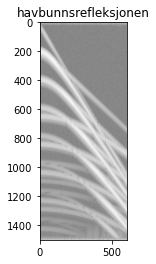

<Figure size 648x1152 with 0 Axes>

In [82]:
#nmo_val = nmo_correction(seis1[:,0], offset1[:,0],6, 1600)
f_seis = list_konvin3190(seis1, 0, h1)
log_seis = 20*log10(abs(f_seis))

#plott av filtrert data:
plt.imshow(log_seis, cmap='gray')
#plt.axis('equal')
plt.title('havbunnsrefleksjonen')
plt.xlim(0,600)
plt.figure(figsize=(9,16))
plt.show()

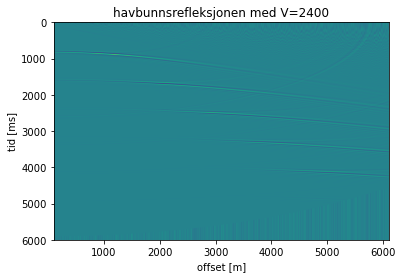

In [83]:
vmno = 1624

seisnmo, reflect_time1, reflect_time2 = nmo_correction(time, 0.1, offset1, seis1, vmno)
plt.imshow(seisnmo, extent=[100,6100,6000,0], aspect='auto')
plt.title('havbunnsrefleksjonen med V=2400')
plt.xlabel('offset [m]')
plt.ylabel('tid [ms]')
plt.show()

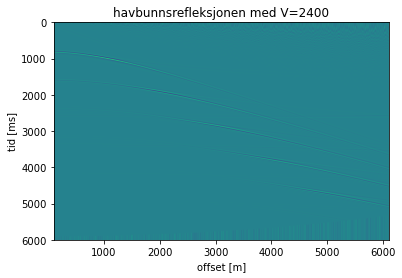

In [84]:
#prøver oppgave 6b

vmno = 2400
seisnmo, reflect_time1, reflect_time2 = nmo_correction(time, 0.1, offset1, seis1, vmno)
plt.imshow(seisnmo, extent=[100,6100,6000,0], aspect='auto')
plt.title('havbunnsrefleksjonen med V=2400')
plt.xlabel('offset [m]')
plt.ylabel('tid [ms]')
plt.show()

vi ser at havbunnen flater ut rundt 2400. lyd hastigheten for det grunneste sedimentet flater ut på 2400m/s

Oppgave 7:

7a+7b) Får å finne hastigheten til det grunneste sedimentærlaget, må vi finne avstanden mellom offset1 og tiden det tar for lyden til å reflektere tilbake. Fra de forrige plotene, så ser vi at den tiden er = total tid - tid i vann = 0.2 sekunder. Vi ser også att offset 1 er på circa 1500m og offset 2 på 2200m fra oppgave 6a og 6b. Fra koden nede blir hastigheten cirka 3500m/s. på den dypeste sedement blir det omtrent 2666m/s.

In [85]:
#oppgave 7a
v = (2200-1500)/0.2
print('Hastighet=', v)

#oppgave 7b
#regner for dypeste sedement 
v = (3500-2700)/0.3
print('hastighet for den dypeste sedement:', v)

Hastighet= 3500.0
hastighet for den dypeste sedement: 2666.666666666667


oppgave 7C

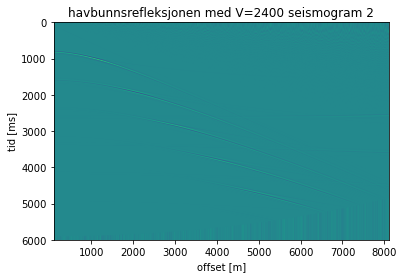

In [92]:
vmno = 2400
seisnmo, reflect_time1, reflect_time2 = nmo_correction(time, 0.1, offset2, seis2, vmno)
plt.imshow(seisnmo, extent=[100,8100,6000,0], aspect='auto')
plt.title('havbunnsrefleksjonen med V=2400 seismogram 2')
plt.xlabel('offset [m]')
plt.ylabel('tid [ms]')
plt.show()


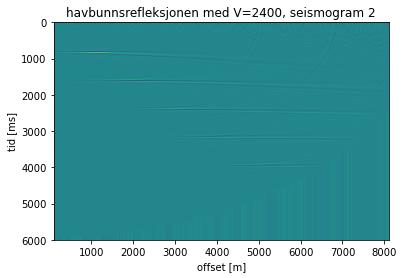

In [91]:
vmno = 1500
seisnmo, reflect_time1, reflect_time2 = nmo_correction(time, 0.1, offset2, seis2, vmno)
plt.imshow(seisnmo, extent=[100,8100,6000,0], aspect='auto')
plt.title('havbunnsrefleksjonen med V=2400, seismogram 2')
plt.xlabel('offset [m]')
plt.ylabel('tid [ms]')
plt.show()

Oppgave 7c) Sidens seismogram 2 har lengre offset, kan vi få ett mer nøyaktig lydhastighet i de forskjellige sedementene. 

oppgave 7d)

Dybde sediment 1:            700m

Dybde sediment 2:           1200m

Hastighet vannlag:          1628m/s

Hastighet sedimentærlag 1:  3500m/s

Hastighet sedimentærlag 2:  2667m/s
